In [13]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import importlib

In [15]:
print(os.getcwd())
#import sys
#sys.path.append('..')

/Users/andreamaldonado/git_tree/perfSky/notebooks


In [16]:
from perfSky import Visualizer as pt

In [24]:
#df = pd.read_csv("../data/daily.2019-July_September.csv")
df = pd.read_csv("../data/clustered_agg_edit_100_daily.csv", sep=";")
df = df[['case', 'activity', 'start_time', 'end_time','cluster_id']]
df.head()

,case,activity,start_time,end_time,cluster_id
0,daily.2019-09-24_05-05-02,AllTasks,2019-09-24 05:05:32+00:00,2019-09-24 16:55:33+00:00,96
1,daily.2019-09-24_05-05-02,DumpTask(sql_filename=regular_urls)(kvs=None)(...,2019-09-24 05:20:10+00:00,2019-09-24 05:40:21+00:00,87
2,daily.2019-09-24_05-05-02,DumpTask(sql_filename=reprocess_urls)(kvs=None...,2019-09-24 05:20:10+00:00,2019-09-24 05:21:03+00:00,64
3,daily.2019-09-24_05-05-02,DumpTask(sql_filename=daily_urls)(kvs=None)(ch...,2019-09-24 05:20:10+00:00,2019-09-24 05:21:32+00:00,95
4,daily.2019-09-24_05-05-02,ProxySetupTask,2019-09-24 05:20:10+00:00,2019-09-24 05:32:45+00:00,3


In [25]:
vis = pt.Vis()
excluding = vis.get_relative_timestamps(df, ['AllTasks']) #'AllTasks' is one entry per log with its overall duration

print('Data set contains:')
print('- ',len(excluding),'events')
print('- ',len(excluding['case'].unique()),'cases')
print('- ',len(excluding['activity'].unique()),'activities')
#print('- ',len(excluding['cluster_id'].unique()),' clustered activities')



Grouped: 61914 columns ['case', 'activity', 'start_time', 'end_time', 'cluster_id', 'zero_point']
Merged relatived: 61944 columns ['case', 'activity', 'start_time', 'end_time', 'cluster_id_x', 'zero_point', 'cluster_id_y']


ValueError: unconverted data remains: +00:00

In [29]:
clusters = pd.read_csv("../data/clusteringeditagglomerative.csv")
clusters['activity'] = clusters['concept:name']
clusters = clusters[['cluster_id','activity']]
print(len(clusters['activity'].unique()))
#clusters.head()

262


In [32]:
df_cl = df.join(clusters.set_index('activity'), on='activity')
print(len(df_cl[df_cl['cluster_id'].isnull()]))

186


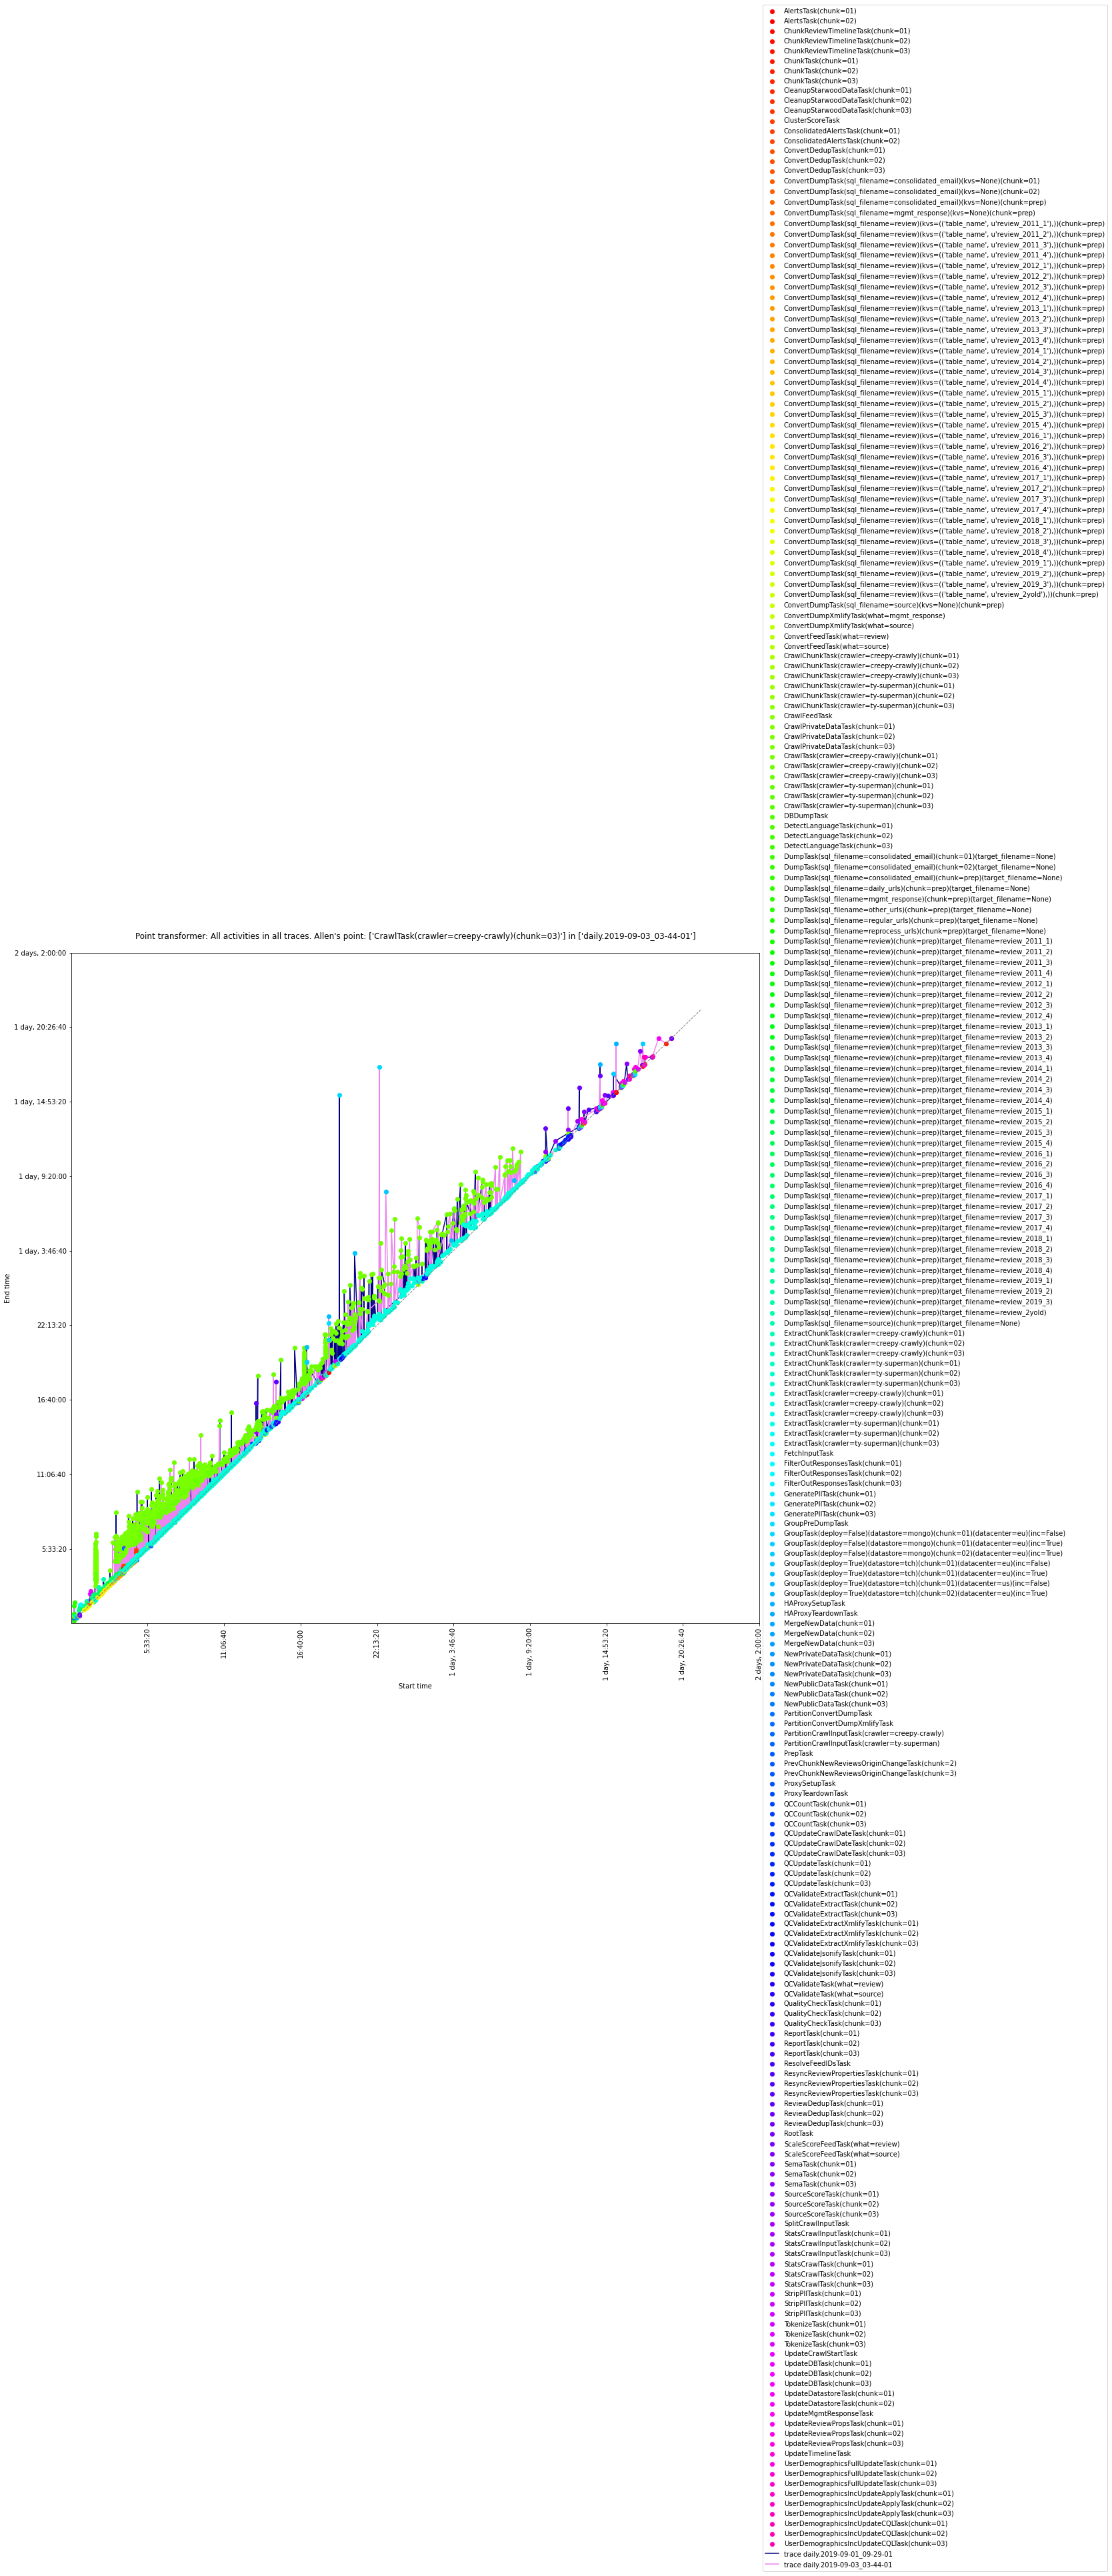

In [18]:
vis.plot_all_traces(excluding, show_plot=None)